# Example 2: Prediction

## WD & libraries

### Libraries

In [1]:
# Data manipulation
# ==============================================================================

import os 
import pandas as pd
import numpy as np
import operator
from joblib import dump
from joblib import dump


# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

from sklearn.model_selection import train_test_split, learning_curve, validation_curve, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, roc_curve, auc, confusion_matrix

# Modeling 
# ==============================================================================

from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

### Set Working Directory

In [2]:
# Set the working directory

workspace_directory = "/Users/oskyroski/DataScience/MachineLearning/2. Supervised Prediction"
os.chdir(workspace_directory)

## 0. Understand the business

In the realm of real estate, accurately predicting housing prices is not just a matter of economic interest but also of significant practical importance for both buyers and sellers in the market. This challenge encompasses various factors, including location, property features, market trends, and even broader economic indicators. The complexity and dynamic nature of these variables make housing price prediction a quintessential problem well-suited for Machine Learning (ML).

Machine Learning offers a robust framework for modeling and predicting housing prices by learning from historical data, recognizing patterns, and making informed predictions on unseen data. By employing ML algorithms, we can systematically account for the multifaceted relationships between numerous features and the final sale price. This not only enhances the accuracy of predictions but also provides insights into which factors most significantly impact housing values.

Furthermore, leveraging ML in housing price prediction empowers stakeholders with data-driven decision-making tools. For potential buyers, it helps in assessing the fair value of a property, ensuring they pay a reasonable price. For sellers, it aids in strategically setting house prices to maximize return while remaining competitive in the market. For investors and developers, understanding price determinants and future trends supports better investment and development strategies. Thus, the application of ML in this domain is a powerful enabler for making more transparent, fair, and efficient real estate transactions, benefiting all parties involved in the housing market.

## 1. Define the problem

### Data Description

The housing dataset comprises a comprehensive collection of features that potentially influence a house's sale price. These features include both numerical and categorical data types, ranging from basic attributes like the square footage of living space, number of bedrooms and bathrooms, to more nuanced characteristics such as the home's age, location specifics (e.g., proximity to key amenities or waterfront views), and condition grades. This rich dataset enables a detailed analysis of factors affecting housing prices, providing a solid foundation for predictive modeling.

### Objective

The primary objective is to develop a predictive model that can accurately estimate the sale price of houses based on their characteristics. By achieving high accuracy in price prediction, this model aims to serve as a decision support tool for potential buyers, sellers, and investors in the real estate market. The goal is to demystify the housing market's pricing mechanisms, making it more accessible and transparent for all stakeholders involved.

### Modeling Approaches

Several modeling approaches can be employed to tackle the housing price prediction problem, each with its strengths and applicable scenarios. Here are some potential methodologies:

1. Linear Regression: A baseline model that assumes a linear relationship between the features and the target variable. It's simple, interpretable, and provides a good starting point.
2. Polynomial Regression: Extends linear regression by considering polynomial features to capture non-linear relationships.
3. Decision Trees: Offer intuitive models that use a tree-like model of decisions and their possible consequences, handling both numerical and categorical data.
4. Random Forest: An ensemble of decision trees that improves prediction accuracy by reducing overfitting.
5. Gradient Boosting Machines (GBM): Sequentially builds weak models, typically decision trees, to correct errors made by previous models, often leading to superior accuracy.
6. XGBoost/LightGBM/CatBoost: Specialized gradient boosting frameworks that provide fast, efficient, and highly accurate models.
7. Support Vector Machines (SVM): Effective for high-dimensional spaces, SVMs can model complex, non-linear relationships.
8. K-Nearest Neighbors (KNN): A non-parametric method that predicts the value of a data point based on the weighted average of the k closest neighbors.
9. Neural Networks: Deep learning models that can capture complex non-linear relationships through layers of neurons. Particularly useful for capturing intricate patterns in large datasets.
10. Lasso/Ridge Regression: Linear models with regularization to prevent overfitting and manage multicollinearity.
11. Elastic Net: Combines features of Lasso and Ridge, adjusting the mix of regularization types for better performance.
12. Principal Component Regression (PCR): Combines Principal Component Analysis (PCA) with Linear Regression to deal with multicollinearity and high dimensionality.
13. Partial Least Squares Regression (PLSR): Similar to PCR, focuses on predicting the target variable while considering the direction with the highest variance.
14. Generalized Additive Models (GAMs): Extend linear models by allowing non-linear functions of the features while maintaining interpretability.

Each of these approaches has its considerations, such as the need for feature scaling, handling of categorical variables, and the trade-off between model complexity and interpretability. The choice of model will depend on the dataset's characteristics, the importance of interpretability, and the computational resources available.

## 2. Prepare the Data

### Data Gathering

In [5]:
# Load the CSV file
Housing = pd.read_csv("Housing.csv")

# print(Housing.head())

# Define the target variable (Y) and the feature matrix (X)
Y = Housing['price']
X = Housing.drop('price', axis=1)

### EDA 

#### Metrics

In [7]:
# Generate descriptive statistics
desc_stats = Housing.describe().transpose()

# Calculate mode for each feature
modes = Housing.mode().iloc[0]

# Count missing values for each feature
missing_values = Housing.isnull().sum()

# Adding mode and missing values to the descriptive statistics
desc_stats['mode'] = modes
desc_stats['missing_values'] = missing_values

# Display the descriptive statistics table
print(desc_stats)

           count          mean           std        min        25%        50%  \
price      545.0  4.766729e+06  1.870440e+06  1750000.0  3430000.0  4340000.0   
area       545.0  5.150541e+03  2.170141e+03     1650.0     3600.0     4600.0   
bedrooms   545.0  2.965138e+00  7.380639e-01        1.0        2.0        3.0   
bathrooms  545.0  1.286239e+00  5.024696e-01        1.0        1.0        1.0   
stories    545.0  1.805505e+00  8.674925e-01        1.0        1.0        2.0   
parking    545.0  6.935780e-01  8.615858e-01        0.0        0.0        0.0   

                 75%         max     mode  missing_values  
price      5740000.0  13300000.0  3500000               0  
area          6360.0     16200.0   6000.0               0  
bedrooms         3.0         6.0      3.0               0  
bathrooms        2.0         4.0      1.0               0  
stories          2.0         4.0      2.0               0  
parking          1.0         3.0      0.0               0  


##### Charts

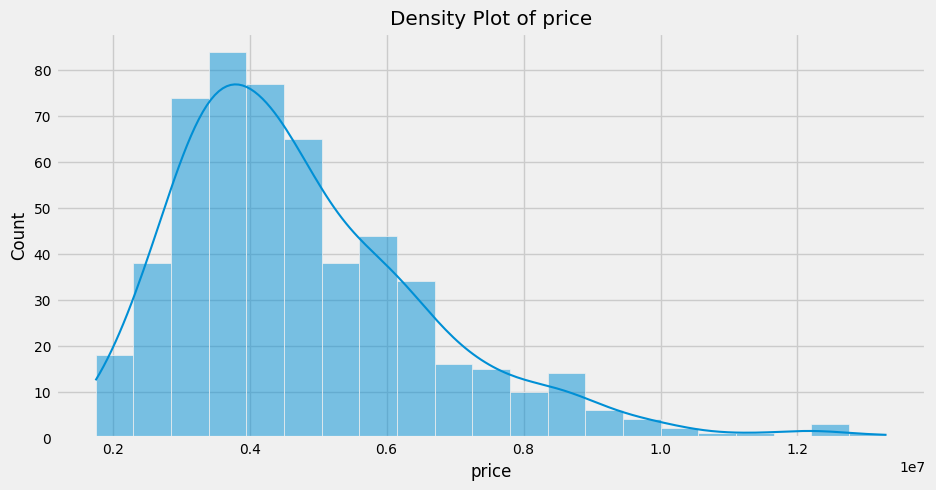

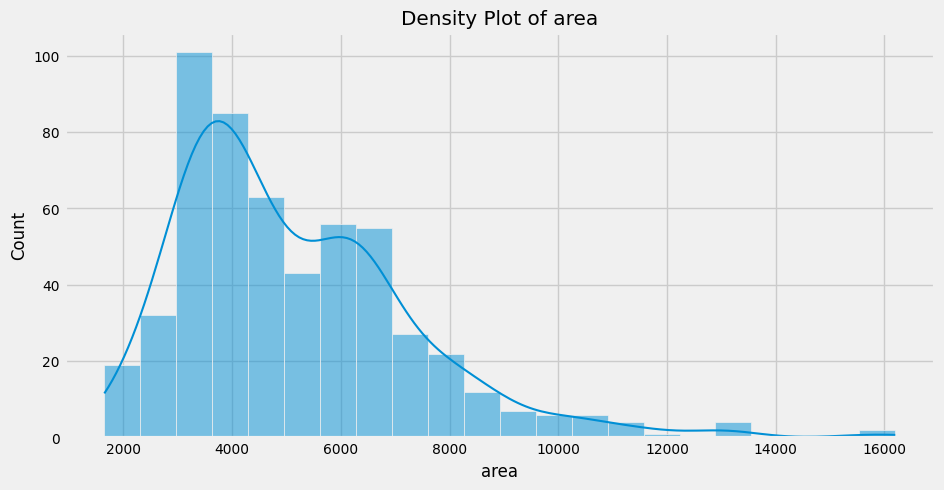

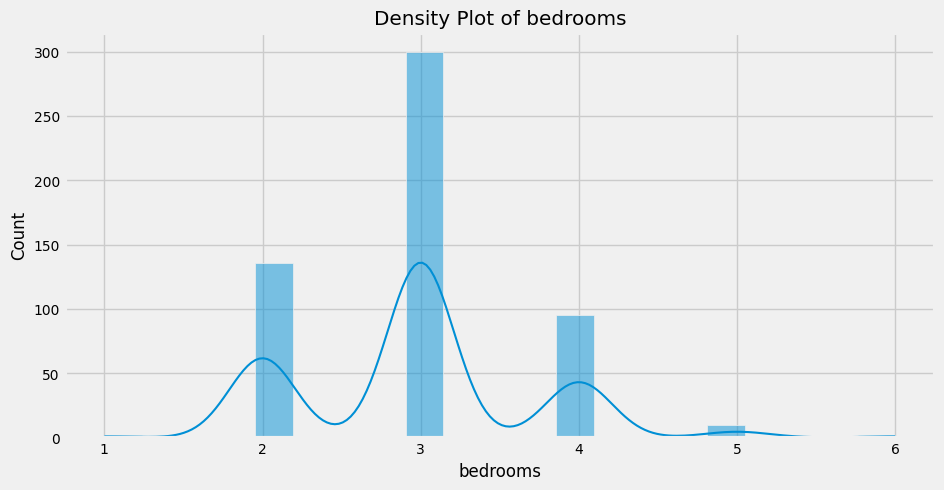

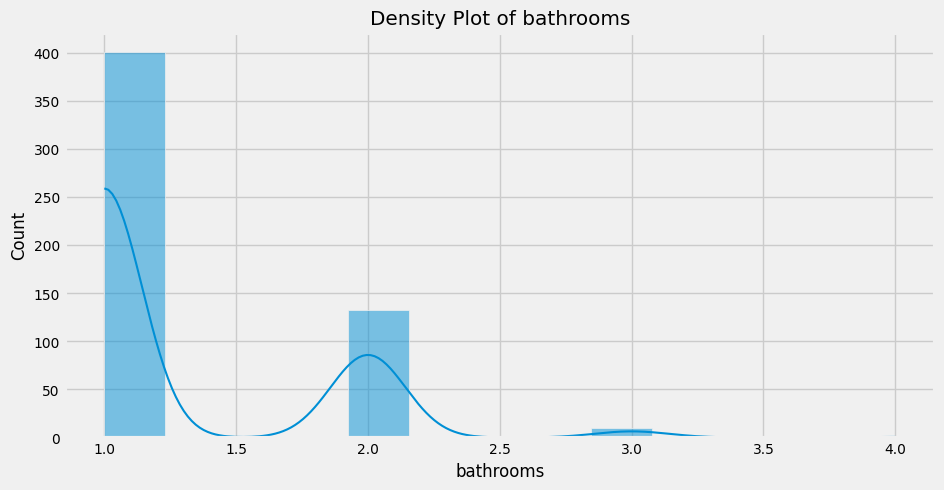

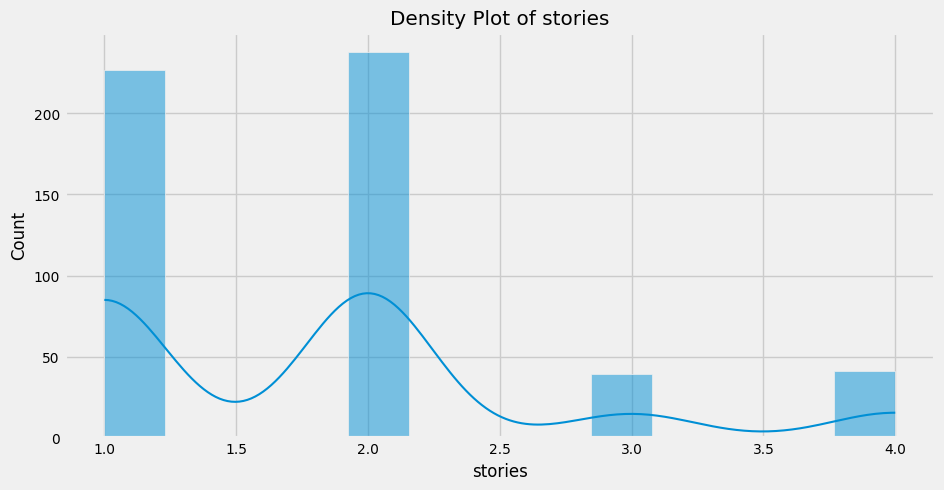

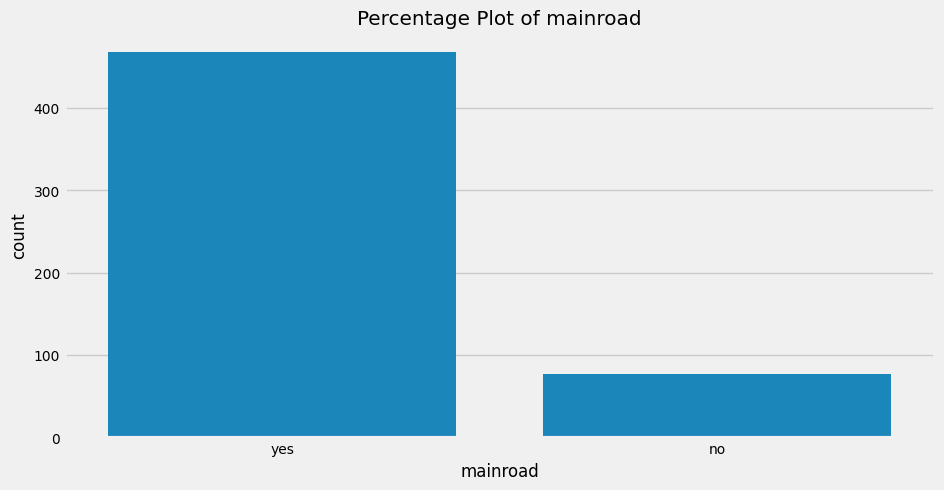

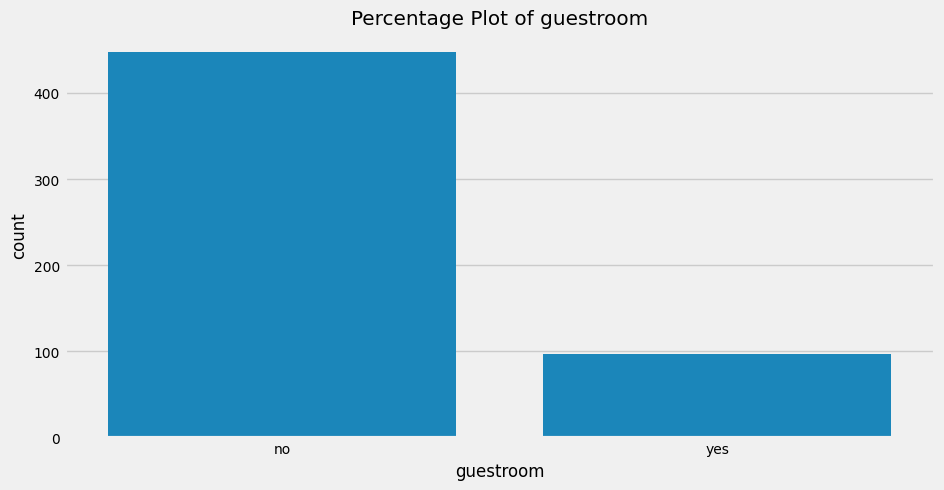

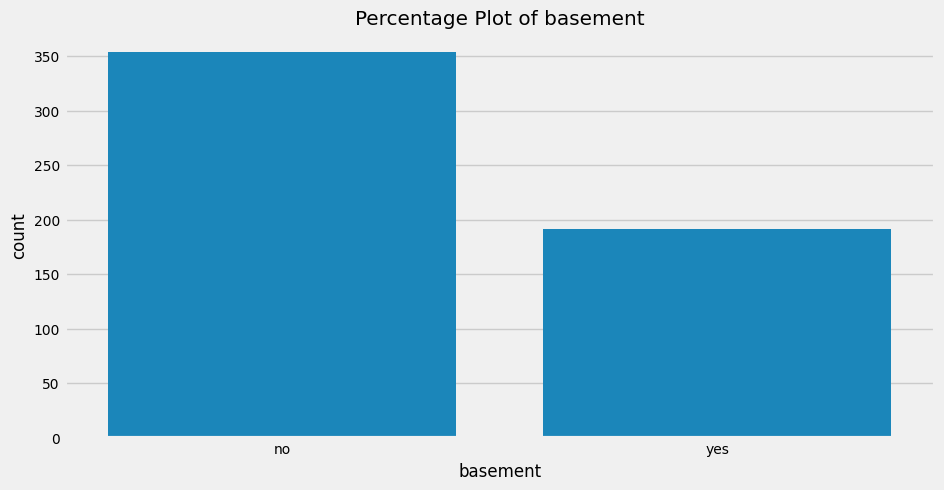

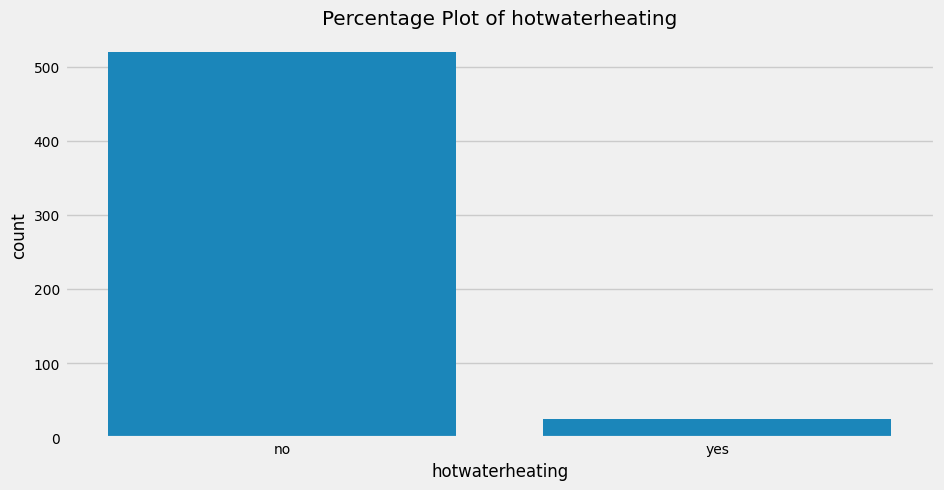

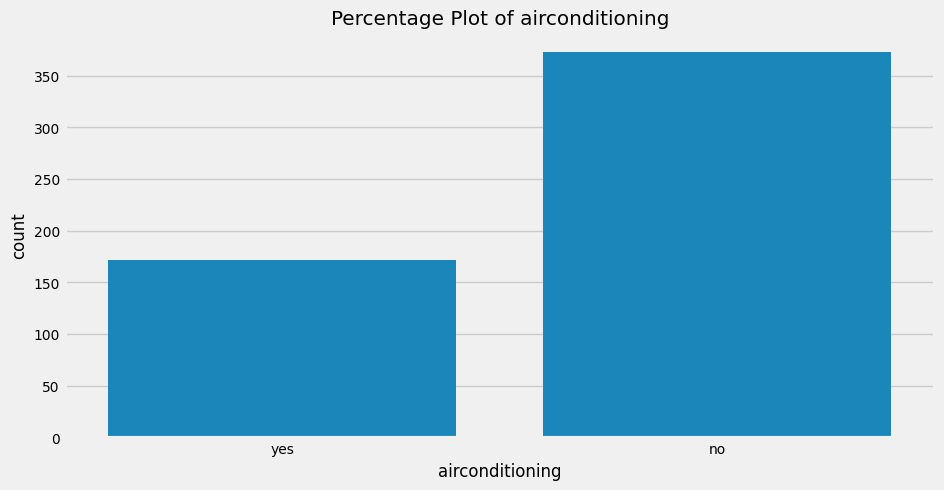

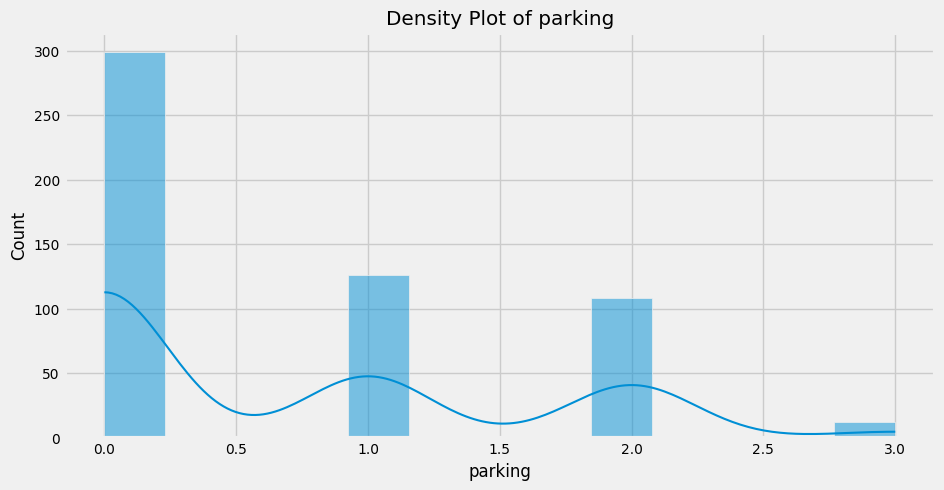

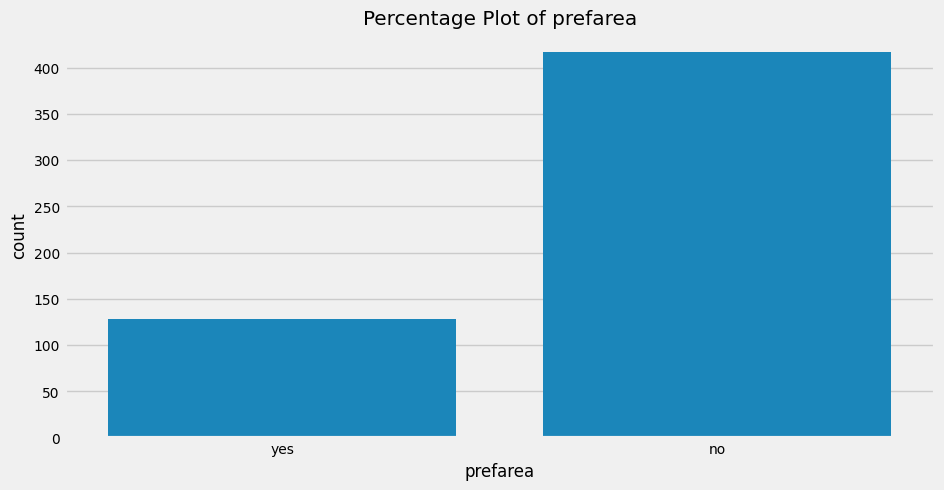

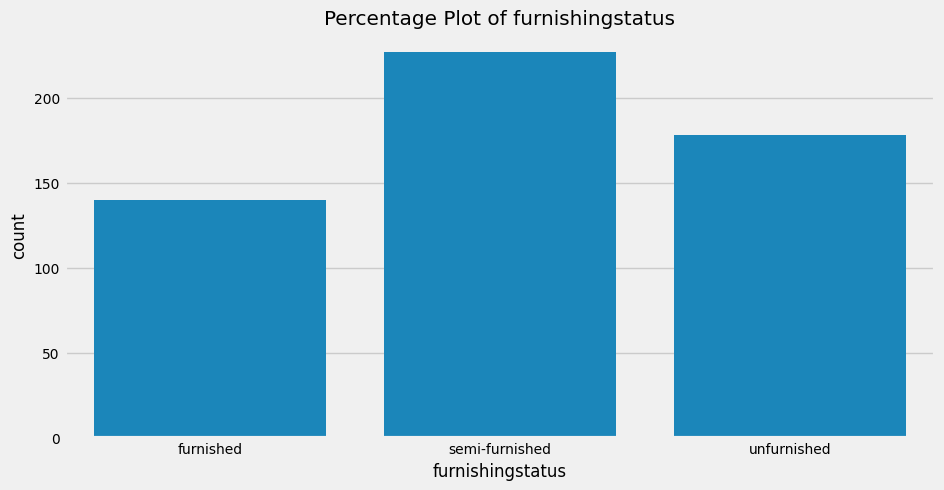

In [9]:
# Plotting cols
for column in Housing.columns:
    plt.figure(figsize=(10, 5))

    # If the column is numeric, plot a density plot
    if Housing[column].dtype != 'object':
        sns.histplot(Housing[column], kde=True)
        plt.title(f'Density Plot of {column}')

    # If the column is categorical, plot a count plot
    else:
        sns.countplot(x=column, data=Housing)
        plt.title(f'Percentage Plot of {column}')

    plt.show()

### Data Splitting

Let's split the data into  training/testing sets

In [10]:
# Splitting the data
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.25, random_state=42)

# Calculate descriptive statistics and mode
train_desc = Y_train.describe(percentiles=[.25, .75])
valid_desc = Y_valid.describe(percentiles=[.25, .75])
train_mode = Y_train.mode()[0]
valid_mode = Y_valid.mode()[0]

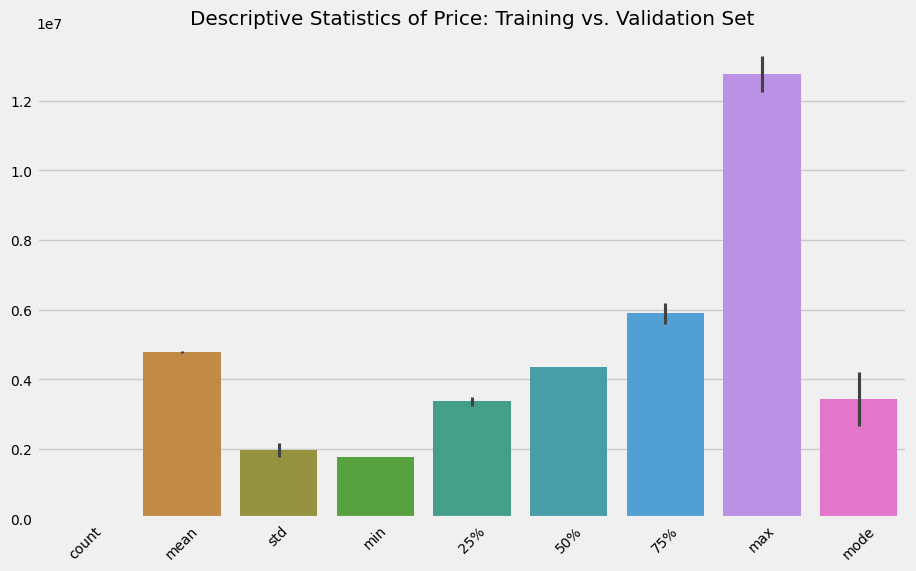

In [11]:
# Creating a DataFrame for comparative analysis
stats_comparison = pd.DataFrame({'Training Set': train_desc, 'Validation Set': valid_desc})
stats_comparison.loc['mode'] = [train_mode, valid_mode]  # Add mode

# Since I can't directly show the table, here's how you might visualize it
plt.figure(figsize=(10, 6))
sns.barplot(data=stats_comparison.transpose())
plt.title('Descriptive Statistics of Price: Training vs. Validation Set')
plt.xticks(rotation=45)
plt.show()

In [13]:
train_stats_df = train_desc.to_frame(name='Training Set')
valid_stats_df = valid_desc.to_frame(name='Validation Set')

# Adding mode to the DataFrames
train_stats_df.loc['mode'] = train_mode['mode']
valid_stats_df.loc['mode'] = valid_mode['mode']

# Combine the training and validation stats into a single DataFrame for comparison
comparison_df = pd.concat([train_stats_df, valid_stats_df], axis=1)

# Display the DataFrame for comparison
print(comparison_df)

       Training Set  Validation Set
count  4.080000e+02    1.370000e+02
mean   4.751249e+06    4.812830e+06
std    1.767499e+06    2.154561e+06
min    1.750000e+06    1.750000e+06
25%    3.500000e+06    3.234000e+06
50%    4.340000e+06    4.340000e+06
75%    5.600000e+06    6.195000e+06
max    1.225000e+07    1.330000e+07
mode   4.200000e+06    2.660000e+06


## 3. Choose a Model(s)

For predicting housing prices, which is a regression task, there are several machine learning models that can be effectively applied. Here's a list of 10 potential models, named as requested:

- Model 1 - Linear Regression: A simple yet powerful model for regression tasks. It assumes a linear relationship between the independent variables and the dependent variable.
- Model 2 - Ridge Regression: An extension of linear regression that includes L2 regularization, which can help prevent overfitting by penalizing large coefficients.
- Model 3 - Lasso Regression: Similar to Ridge Regression but uses L1 regularization, encouraging sparsity in the coefficients (i.e., leading to coefficients that can be exactly zero).
- Model 4 - Elastic Net Regression: Combines the properties of both Ridge and Lasso regression, using both L1 and L2 regularization, which can be especially useful if there are correlations among features.
- Model 5 - Decision Tree Regressor: A model that uses a decision tree to go from observations about an item to conclusions about the item's target value. It's capable of capturing complex non-linear relationships.
- Model 6 - Random Forest Regressor: An ensemble model that uses multiple decision trees to improve prediction accuracy and control over-fitting.
- Model 7 - Gradient Boosting Regressor: An ensemble technique that builds trees one at a time, where each new tree helps to correct errors made by previously trained trees.
- Model 8 - Support Vector Regressor (SVR): Based on the Support Vector Machine (SVM) algorithm, designed for regression tasks. It can handle both linear and non-linear regression through the use of different kernels.
- Model 9 - K-Neighbors Regressor: A non-parametric method that predicts the value of a data point by averaging the values of the k nearest neighbors.
- Model 10 - XGBoost Regressor: An implementation of gradient boosted decision trees designed for speed and performance. It's known for its efficiency in handling large datasets and high performance in predictive accuracy.

Each of these models has its strengths and can be applied to the housing price prediction problem. The choice of model might depend on the specific characteristics of your dataset, such as the number of features, the presence of non-linear relationships, and the size of the dataset. It's often beneficial to experiment with multiple models and compare their performance to select the best model for your specific task.

## 4. Train the Model

## 5. Evaluate the Model

## 6. Parameter Tuning

## 7. Make Prediction

## 8.ML Ops

## Session information

In [ ]:
import session_info
session_info.show(html=False)